In [1]:
import pandas as pd

In [2]:
# model 훈련을 위한 데이터 생성
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
# 어떤 종류의 생선이 있는지 확인 => 7종류 존재 확인 가능
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
#생선 종류를 제외한 나머지 데이터들을 입력 데이터로 설정
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]

In [5]:
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [6]:
fish_target = fish['Species']

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
# 사이킷런 KNeighborsClassifier 클래스 객체를 만들기 -> 훈련 세트로 모델 훈련->  훈련 세트 & 테스트 세트 점수 확인
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


**다중분류** : target 데이터에 2개 이상의 class가 존재하는 분류 문제


*   사이킷런에서는 문자열로 된 타깃값 그대로 사용 가능
* 이때 문자열 타깃 값이 알파벳 순으로 배열되므로 정렬된 타깃값 확인 필요





In [10]:
# KNeighborsClassifier에서 정렬된 타깃값 확인
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [11]:
# 처음 테스트세트의 5개 샘플의 타깃값 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [12]:
# predict_proba() : 클래스 별 확률값 반환
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) # [1st class, 2nd class,  ... , nth class]의 순서대로 확률값 나타내줌
print(np.round(proba, decimals = 4)) # 소수점 네번째 자리로 반올림

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [13]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target.iloc[indexes[0]])
# 해당 샘플의 이웃으로 Roach, Perch, Perch가 나왓으므로 다섯번째 클래스에 대한 확률은 1/3, 세번째 perch 클래스에 대한 확률은 2/3가 나옴
# 그러나 이렇게 하면 이웃 3개 중에서의 확률을 보게 되므로 가능한 확률이 분모가 3으로만 나오게 됨. -> 확률표시가 어색해짐

52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


# 로지스틱 회귀
* 분류를 수행하는 회귀 모델
* 선형 회귀와 동일하게 선형 방정식을 학습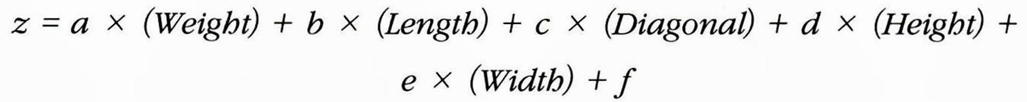
* 이때 z값이 확률값이 되기 위해서는 z가 매우 큰 음수일때는 0으로, 매우 큰 양수일때는 1이 되도록 **시그모이드 함수(=로지스틱 함수)**를 이용해 변환해 줘야함
* 시그모이드 함수식
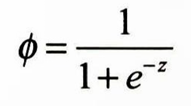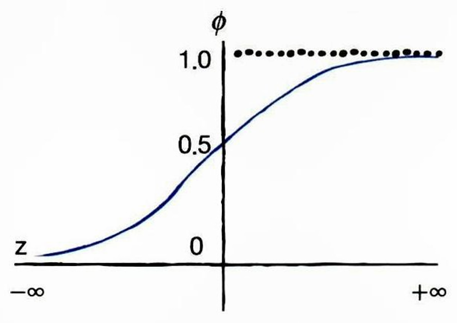

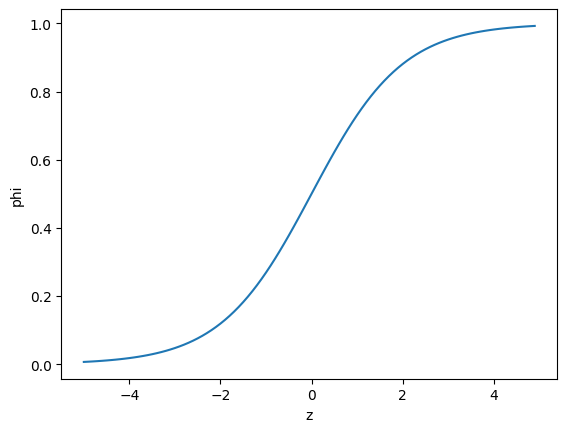

In [14]:
#시그모이드 함수 그리기
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

**불리언 인덱싱** : 넘파이 배열은 true, false 값을 전달해 행 선택 가능

In [15]:
# A,C만 true로 설정해 boolean indexing
char_arr = np.array(['A', 'B', 'C', 'D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [16]:
# 도미(bream)와 빙어(smelt)만 고르기 => 얘네만 true 설정
bream_smelt_indexes = (train_target == 'Bream')|(train_target == 'Smelt') # | = or 연산자
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [17]:
# 위의 코드에서 |연산자 이용해서 인덱싱 한 것 처럼 a,c선택하는 코드를 작성할 수도 있다char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
mask = (char_arr == 'A') | (char_arr == 'C')   # 조건식으로 boolean mask 생성
print(char_arr[mask])

['A' 'C']


In [18]:
# LogisticRegression 클래스는 선형 모델이므로 sklearn.linear_model 패키지 아래에 있음
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [19]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [20]:
print(lr.predict_proba(train_bream_smelt[:5]))
# 첫번째 열이 음성 클래스(0)에 대한 확률, 두번째 열이 양성클래스(1)에 대한 확률

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [21]:
# 무엇이 양성 class, 무엇이 음성 class 인지 확인
print(lr.classes_) # 실행 결과 앞에 먼저 나온 클래스가 음성, 두번째 나온 클래스가 양성임
# 도미를 양성 클래스(1)로 이용하기 위해서는 target 값을 1로 만들고 나머지는 0으로 만들어 사용하면 됨.
# train_binary = (train_target == 'Bream').astype(int)이렇게 하면 도미의 값만 1로, 나머지는 0으로 변경 가능

['Bream' 'Smelt']


. 연산자 : 객체가 가진 속성/기능에 접근하는 연산자
* person.name
* 위의 코드에서는 person 객체가 가진 name이라는 값(변수)를 읽는것임

In [22]:
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


위의 계수 + 상수항 이용해서 모델이 학습한 방정식 구하면 아래와 같음

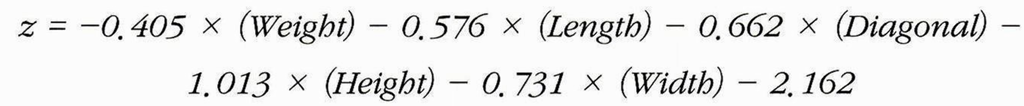

In [23]:
# z값 출력
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [24]:
from scipy.special import expit
# scipy라이브러리 불러와서 사이파이 라이브러리의 시그모이드 함수 이용
print(expit(decisions)) # 시그모이드함수에 대입해 decision배열의 값을 확률로 변환
# print(lr.predict_proba(train_bream_smelt[:5])) 결과의 두번째 (양성클래스) 열과 동일함

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


로지스틱 회귀를 이용한 다중분류

In [25]:
lr = LogisticRegression(C=20, max_iter = 1000) # C : 규제값, max_inter : 매개변수 반복 횟수
# 규제값 완화 위해 C를 20으로 설정, 충분한 반복 위해 max_iter = 1000으로 반복 많이 수행
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


* C : LogisticRegression에서 규제를 제어하는 매개변수

LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제. 이런 규제를
L2 규제라 함. 릿지 회귀에서 alpha 매개변수로 규제의 양을 조절한거처럼 LogisticRegression에선 매개변수 C로 규제 조절. 이때, 릿지에선 alpha가
커지면 규제도 커졌지만 로지스틱 회귀에선 alpha와 반대로 C값이 작을수록 규제가 커짐
* C의 기본값: 1

--------------------------------------------------------------------------
* max_iter 매개변수 : 반복 횟수를 지정

LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용. 이때의 반복 횟수를 정하는게 max_iter 매개변수.


In [26]:
# 처음 세트 다섯개 샘플에 대한 예측 출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [27]:
# 테스트세트에 대한 예측 확률 출력
# 7개의 생선에 대한 확률을 계산했으므로 7개의 열이 출력 됨
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [28]:
# 몇번째 열이 뭐에 대한 확률인지 확인
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [29]:
# 다중 분류 선형 방정식의 coef_와 intercept_ 크기 출력
print(lr.coef_.shape, lr.intercept_.shape)
# coef의배열은 7행 5열이 나옴. => 5개의 특성(무게, 가로길이, 대각선 길이, 세로길이, 폭)을 사용했고, 7개의 물고기 종류 이용했기 때문!
# intercept는 각 물고기 당 하나씩 나오므로 7행으로 나옴!

(7, 5) (7,)


* 로지스틱 회귀 결과 각 class별로 방정식 하나가 나오게 됨
* class 1의 z값을 z1이라 하자면 아래의 식처럼 나옴.
z1 = w1_1*x1 + w1_2*x2 + w1_3*x3 + w1_4*x4 + w1_5*x5 + b1

이 결과 나온 z값을 바탕으로 각클래스가 정답일 확률을 계산하면 P(class1 | x) = softmax(z1)

argmax([P1, P2, ..., P7])해서 확률이 가장 높은 클래스를 예측값으로 선택!!

# 소프트 맥스 함수
* 여러개의 선형 방정식 결과를 각각 0~1사이의 확률로 변환
* 여러 클래스 중 하나의 클래스를 선택해야 하는 다중 분류에 사용됨
* 소프트 맥스는 가장 확률이 큰 클래스를 고르는 함수인데 지수함수는 z의 차이를 크게 벌리는 효과가 있
1. 모든 z값을 e^z로 변환

2. 모든 e^z값들의 합인 e_sum 계산

3. e^zn / e_sum 값 계산

In [30]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [31]:
from scipy.special import softmax
proba = softmax(decision, axis = 1) # axis는 소프트맥스를 계산할 축을 지정, 1로 설정하여 각 샘플에 대한 소프트맥스 계
print(np.round(proba, decimals = 3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
